#📌 Extracción

In [48]:
import numpy as np

In [221]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

df = pd.read_json(url)
df_expanded = pd.json_normalize(df.to_dict(orient="records")) #Necesita un diccionario nativo para comenzar a aplanar los datos
df_expanded.sample(5)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
1212,1730-ZMAME,No,Female,1,No,No,32,Yes,No,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.50,2665
1562,2232-DMLXU,Yes,Female,0,Yes,No,1,Yes,No,DSL,...,No,No,No,Yes,No,Month-to-month,No,Mailed check,55.20,55.2
5356,7315-WYOAW,No,Male,0,No,No,13,Yes,Yes,Fiber optic,...,No,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,100.75,1313.25
1251,1791-PQHBB,No,Female,0,No,Yes,2,Yes,No,DSL,...,No,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),61.20,125.95
1232,1763-KUAAW,No,Female,1,No,No,18,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.35,369.6


#🔧 Transformación

## Renombrando columnas

In [222]:
df_expanded.columns = [col.replace(".", "_").lower() for col in df_expanded.columns]
df_expanded

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


## Verificando si hay valores nulos/ausentes/nan

In [225]:

cols_str = df_expanded.select_dtypes(include='object').columns


df_expanded[cols_str] = df_expanded[cols_str].apply(lambda x: x.str.strip())

In [226]:
df_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

## Verificando si hay valores duplicados

In [227]:
duplicados = df_expanded.duplicated()
duplicados.sum()

np.int64(0)

## Inconsistencias datos no corresponde

In [228]:
columnas_de_interes = list(df_expanded.columns)
columnas_de_interes

['customerid',
 'churn',
 'customer_gender',
 'customer_seniorcitizen',
 'customer_partner',
 'customer_dependents',
 'customer_tenure',
 'phone_phoneservice',
 'phone_multiplelines',
 'internet_internetservice',
 'internet_onlinesecurity',
 'internet_onlinebackup',
 'internet_deviceprotection',
 'internet_techsupport',
 'internet_streamingtv',
 'internet_streamingmovies',
 'account_contract',
 'account_paperlessbilling',
 'account_paymentmethod',
 'account_charges_monthly',
 'account_charges_total']

In [229]:
valores_unicos = {col: df_expanded[col].unique() for col in df_expanded.columns}
valores_unicos

{'customerid': array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
        '9993-LHIEB', '9995-HOTOH'], dtype=object),
 'churn': array(['No', 'Yes', ''], dtype=object),
 'customer_gender': array(['Female', 'Male'], dtype=object),
 'customer_seniorcitizen': array([0, 1]),
 'customer_partner': array(['Yes', 'No'], dtype=object),
 'customer_dependents': array(['Yes', 'No'], dtype=object),
 'customer_tenure': array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
        55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
        35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
        22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
        17, 18, 38, 42,  0]),
 'phone_phoneservice': array(['Yes', 'No'], dtype=object),
 'phone_multiplelines': array(['No', 'Yes', 'No phone service'], dtype=object),
 'internet_internetservice': array(['DSL', 'Fiber optic', 'No'], dtype=object),
 'internet_onlinesecuri

In [230]:
vacios = (df_expanded == '').sum()
vacios

,0
customerid,0
churn,224
customer_gender,0
customer_seniorcitizen,0
customer_partner,0
customer_dependents,0
customer_tenure,0
phone_phoneservice,0
phone_multiplelines,0
internet_internetservice,0


In [231]:
df_expanded.replace('', np.nan, inplace=True)
vacios = (df_expanded == '').sum()
vacios

,0
customerid,0
churn,0
customer_gender,0
customer_seniorcitizen,0
customer_partner,0
customer_dependents,0
customer_tenure,0
phone_phoneservice,0
phone_multiplelines,0
internet_internetservice,0


In [232]:
datos_limpio = df_expanded.copy()

In [233]:
datos_limpio = df_expanded.dropna()
datos_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7032 non-null   object 
 1   churn                      7032 non-null   object 
 2   customer_gender            7032 non-null   object 
 3   customer_seniorcitizen     7032 non-null   int64  
 4   customer_partner           7032 non-null   object 
 5   customer_dependents        7032 non-null   object 
 6   customer_tenure            7032 non-null   int64  
 7   phone_phoneservice         7032 non-null   object 
 8   phone_multiplelines        7032 non-null   object 
 9   internet_internetservice   7032 non-null   object 
 10  internet_onlinesecurity    7032 non-null   object 
 11  internet_onlinebackup      7032 non-null   object 
 12  internet_deviceprotection  7032 non-null   object 
 13  internet_techsupport       7032 non-null   object 
 1

## Inconsistencias cruce entre columnas

In [235]:
internet_cols = list(datos_limpio.columns[9:15])

In [236]:
mask = datos_limpio["internet_internetservice"] == "No"

In [237]:
inconsistencias = datos_limpio.loc[mask, internet_cols].apply(lambda x: x != "No internet service")
inconsistencias.head(10)

,internet_internetservice,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv
20,True,False,False,False,False,False
23,True,False,False,False,False,False
24,True,False,False,False,False,False
27,True,False,False,False,False,False
28,True,False,False,False,False,False
29,True,False,False,False,False,False
32,True,False,False,False,False,False
34,True,False,False,False,False,False
36,True,False,False,False,False,False
39,True,False,False,False,False,False


In [238]:
inconsistencias.any().any()

np.True_

## Creacion de cuentas diarias

In [239]:
datos_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7032 non-null   object 
 1   churn                      7032 non-null   object 
 2   customer_gender            7032 non-null   object 
 3   customer_seniorcitizen     7032 non-null   int64  
 4   customer_partner           7032 non-null   object 
 5   customer_dependents        7032 non-null   object 
 6   customer_tenure            7032 non-null   int64  
 7   phone_phoneservice         7032 non-null   object 
 8   phone_multiplelines        7032 non-null   object 
 9   internet_internetservice   7032 non-null   object 
 10  internet_onlinesecurity    7032 non-null   object 
 11  internet_onlinebackup      7032 non-null   object 
 12  internet_deviceprotection  7032 non-null   object 
 13  internet_techsupport       7032 non-null   object 
 1

In [240]:
datos_limpio['cuenta_diarias'] = (datos_limpio['account_charges_monthly'] / 30).round(2)
datos_limpio.sample(5)

/tmp/ipython-input-3714768279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_limpio['cuenta_diarias'] = (datos_limpio['account_charges_monthly'] / 30).round(2)


,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,cuenta_diarias
543,0772-GYEQQ,Yes,Male,0,No,No,3,Yes,No,Fiber optic,...,Yes,Yes,Yes,No,Month-to-month,Yes,Mailed check,88.35,262.05,2.94
6473,8896-RAZCR,No,Female,0,No,Yes,44,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.90,868.1,0.66
342,0495-RVCBF,Yes,Female,0,No,No,1,Yes,No,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.70,79.7,2.66
5080,6941-PMGEP,Yes,Female,0,No,No,5,Yes,No,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,80.00,412.5,2.67
4287,5895-QSXOD,No,Male,0,No,No,9,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,No,Mailed check,70.05,657.5,2.34


In [241]:
datos_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7032 non-null   object 
 1   churn                      7032 non-null   object 
 2   customer_gender            7032 non-null   object 
 3   customer_seniorcitizen     7032 non-null   int64  
 4   customer_partner           7032 non-null   object 
 5   customer_dependents        7032 non-null   object 
 6   customer_tenure            7032 non-null   int64  
 7   phone_phoneservice         7032 non-null   object 
 8   phone_multiplelines        7032 non-null   object 
 9   internet_internetservice   7032 non-null   object 
 10  internet_onlinesecurity    7032 non-null   object 
 11  internet_onlinebackup      7032 non-null   object 
 12  internet_deviceprotection  7032 non-null   object 
 13  internet_techsupport       7032 non-null   object 
 1

In [242]:
listas_a_cambiar = ['churn','phone_phoneservice','account_paperlessbilling']

In [243]:
datos_limpio[listas_a_cambiar] = datos_limpio[listas_a_cambiar].applymap(
    lambda x: 1 if x == "Yes" else 0 if x == "No" else x
)
datos_limpio.sample(5)

/tmp/ipython-input-3799606484.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  datos_limpio[listas_a_cambiar] = datos_limpio[listas_a_cambiar].applymap(
/tmp/ipython-input-3799606484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_limpio[listas_a_cambiar] = datos_limpio[listas_a_cambiar].applymap(


,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,cuenta_diarias
5790,7919-ZODZZ,0,Female,0,Yes,Yes,10,1,No,DSL,...,Yes,No,No,Yes,One year,1,Mailed check,65.90,660.05,2.20
4928,6729-GDNGC,0,Female,1,No,No,20,1,No,Fiber optic,...,No,No,Yes,No,Month-to-month,0,Bank transfer (automatic),80.70,1614.2,2.69
2353,3280-MRDOF,0,Male,1,No,No,30,1,Yes,DSL,...,Yes,Yes,Yes,No,Two year,1,Credit card (automatic),69.10,2093.9,2.30
4332,5949-EBSQK,1,Male,0,Yes,Yes,4,1,No,DSL,...,No,Yes,No,Yes,Month-to-month,0,Credit card (automatic),61.45,229.55,2.05
5119,6993-YCOBK,0,Male,0,Yes,Yes,60,1,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,1,Electronic check,110.60,6586.85,3.69


In [244]:
datos_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7032 non-null   object 
 1   churn                      7032 non-null   int64  
 2   customer_gender            7032 non-null   object 
 3   customer_seniorcitizen     7032 non-null   int64  
 4   customer_partner           7032 non-null   object 
 5   customer_dependents        7032 non-null   object 
 6   customer_tenure            7032 non-null   int64  
 7   phone_phoneservice         7032 non-null   int64  
 8   phone_multiplelines        7032 non-null   object 
 9   internet_internetservice   7032 non-null   object 
 10  internet_onlinesecurity    7032 non-null   object 
 11  internet_onlinebackup      7032 non-null   object 
 12  internet_deviceprotection  7032 non-null   object 
 13  internet_techsupport       7032 non-null   object 
 1

In [245]:
datos_limpio[listas_a_cambiar] = datos_limpio[listas_a_cambiar].astype(np.int8)
datos_limpio.sample(10)

/tmp/ipython-input-2273685150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_limpio[listas_a_cambiar] = datos_limpio[listas_a_cambiar].astype(np.int8)


,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,cuenta_diarias
1014,1427-VERSM,0,Female,0,Yes,No,56,1,No,Fiber optic,...,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,98.70,5669.5,3.29
4352,5973-EJGDP,0,Male,0,No,No,51,1,Yes,Fiber optic,...,Yes,Yes,No,No,Month-to-month,1,Electronic check,87.35,4473,2.91
5275,7205-BAIAD,0,Female,0,No,No,40,1,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,1,Bank transfer (automatic),20.60,827.3,0.69
3505,4829-ZLJTK,0,Female,1,Yes,No,72,1,Yes,Fiber optic,...,Yes,No,Yes,Yes,Two year,1,Electronic check,112.40,8046.85,3.75
6811,9391-TTOYH,0,Female,0,No,No,23,1,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,1,Mailed check,19.50,470.2,0.65
4262,5858-EAFCZ,0,Male,0,No,No,1,1,No,DSL,...,No,No,No,No,Month-to-month,0,Mailed check,44.45,44.45,1.48
6749,9300-RENDD,1,Male,0,No,No,1,1,No,Fiber optic,...,No,No,Yes,No,Month-to-month,1,Electronic check,79.95,79.95,2.66
342,0495-RVCBF,1,Female,0,No,No,1,1,No,Fiber optic,...,No,No,No,Yes,Month-to-month,1,Electronic check,79.70,79.7,2.66
3063,4274-OWWYO,1,Male,0,No,No,1,1,No,Fiber optic,...,No,No,No,No,Month-to-month,1,Electronic check,74.35,74.35,2.48
5160,7037-MTYVW,0,Male,0,Yes,Yes,38,1,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,1,Bank transfer (automatic),85.40,3297,2.85


In [246]:
datos_limpio['account_charges_total']

,account_charges_total
0,593.3
1,542.4
2,280.85
3,1237.85
4,267.4
...,...
7262,742.9
7263,1873.7
7264,92.75
7265,4627.65


In [247]:
filas_vacias = datos_limpio[datos_limpio['account_charges_total'].str.strip() == '']
filas_vacias

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,cuenta_diarias


In [275]:
datos_limpio['account_charges_total'].astype(np.float64)
datos_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7032 non-null   object 
 1   churn                      7032 non-null   int8   
 2   customer_gender            7032 non-null   object 
 3   customer_seniorcitizen     7032 non-null   int64  
 4   customer_partner           7032 non-null   object 
 5   customer_dependents        7032 non-null   object 
 6   customer_tenure            7032 non-null   int64  
 7   phone_phoneservice         7032 non-null   int8   
 8   phone_multiplelines        7032 non-null   object 
 9   internet_internetservice   7032 non-null   object 
 10  internet_onlinesecurity    7032 non-null   object 
 11  internet_onlinebackup      7032 non-null   object 
 12  internet_deviceprotection  7032 non-null   object 
 13  internet_techsupport       7032 non-null   object 
 1

#📊 Carga y análisis

## Analizando Evasion

### Estructura de la evasion

In [276]:
import matplotlib.pyplot as plt

In [277]:
evasion = datos_limpio['churn'].value_counts()
evasion

,count
churn,
0,5163
1,1869


In [278]:
evasion = datos_limpio['churn'].value_counts(normalize=True)
evasion

,proportion
churn,
0,0.734215
1,0.265785


In [311]:
def graficar_pie(serie, titulo='', figsize=(5,5), colores=None, archivo=None):



    serie.plot.pie(
        labels=serie.index,
        autopct='%1.1f%%',
        figsize=figsize,
        colors=colores,
        startangle=90
    )
    plt.ylabel('')  # quitar etiqueta lateral
    plt.title(titulo)
    plt.legend(title='Categorías')  # leyenda
    plt.savefig(archivo)
    plt.show()

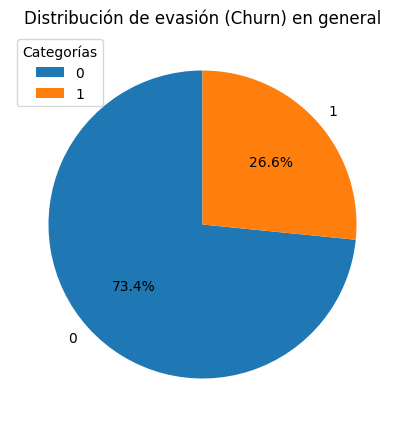

In [313]:
graficar_pie(evasion,'Distribución de evasión (Churn) en general',archivo='evasion_general.png')

### Evasion por categoria

In [281]:
datos_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7032 non-null   object 
 1   churn                      7032 non-null   int8   
 2   customer_gender            7032 non-null   object 
 3   customer_seniorcitizen     7032 non-null   int64  
 4   customer_partner           7032 non-null   object 
 5   customer_dependents        7032 non-null   object 
 6   customer_tenure            7032 non-null   int64  
 7   phone_phoneservice         7032 non-null   int8   
 8   phone_multiplelines        7032 non-null   object 
 9   internet_internetservice   7032 non-null   object 
 10  internet_onlinesecurity    7032 non-null   object 
 11  internet_onlinebackup      7032 non-null   object 
 12  internet_deviceprotection  7032 non-null   object 
 13  internet_techsupport       7032 non-null   object 
 1

In [282]:
churn_por_genero = datos_limpio.groupby(['customer_gender', 'churn']).size().unstack(fill_value=0)
print(churn_por_genero)

churn               0    1
customer_gender           
Female           2544  939
Male             2619  930


In [314]:
def graficar_churn_barras_agregado(df_agregado, titulo='Churn por categoría',
                                   xlabel='Categoría', ylabel='Cantidad de clientes',
                                   stacked=False, colores=['lightgreen','lightcoral'],
                                    archivo=None):

    ax = df_agregado.plot(kind='bar', stacked=stacked, color=colores, figsize=(6,4))
    plt.grid(True)
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title='Churn', labels=['No', 'Sí'])

    for p in ax.patches:
      height = p.get_height() if not stacked else p.get_height()
      ax.text(p.get_x() + p.get_width()/2., p.get_y() + height + 0.1,
              int(height), ha="center", va='bottom')
    plt.savefig(archivo)
    plt.show()

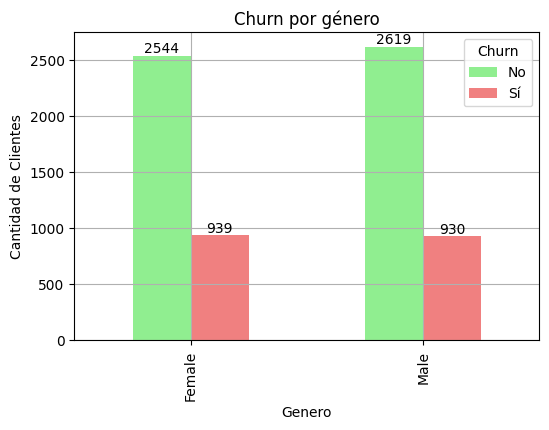

In [315]:
graficar_churn_barras_agregado(churn_por_genero,'Churn por género','Genero','Cantidad de Clientes',archivo='churn_genero.png')

In [285]:

distri_por_tipo_contrato= datos_limpio.groupby([ 'account_contract', 'churn']).size().unstack(fill_value=0)



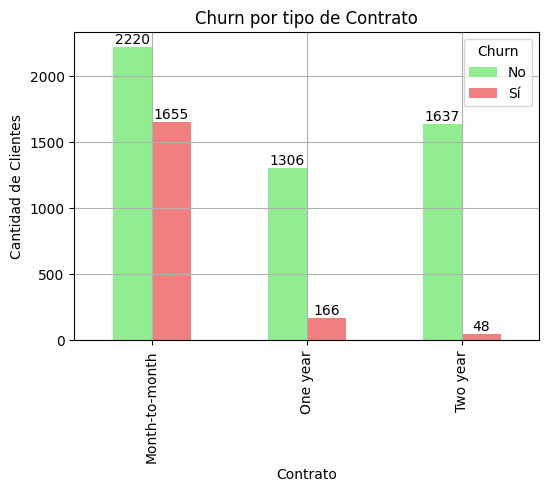

In [316]:
graficar_churn_barras_agregado(distri_por_tipo_contrato,'Churn por tipo de Contrato','Contrato','Cantidad de Clientes',archivo='churn_contrato.png')

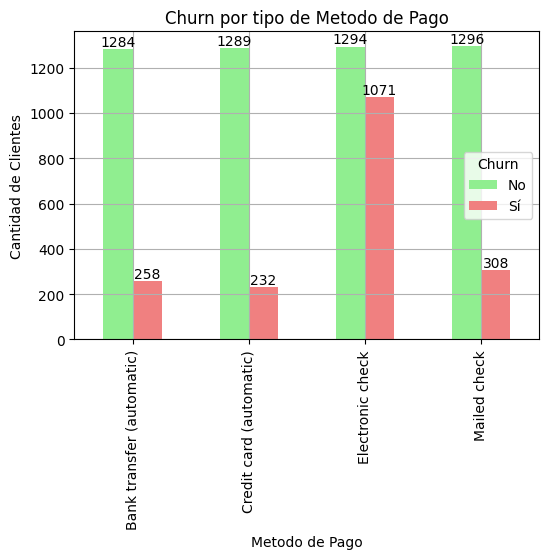

In [317]:
distri_por_metodo_pago= datos_limpio.groupby([ 'account_paymentmethod', 'churn']).size().unstack(fill_value=0)
graficar_churn_barras_agregado(distri_por_metodo_pago,'Churn por tipo de Metodo de Pago','Metodo de Pago','Cantidad de Clientes',archivo='churn_metodo_pago.png')

## Analisis

In [288]:
datos_limpio.describe()

,churn,customer_seniorcitizen,customer_tenure,phone_phoneservice,account_paperlessbilling,account_charges_monthly,account_charges_total,cuenta_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,32.421786,0.903299,0.592719,64.798208,2283.300441,2.159891
std,0.441782,0.368844,24.545260,0.295571,0.491363,30.085974,2266.771362,1.002955
min,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,1.187500
50%,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,2.340000
75%,1.000000,0.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,2.992500
max,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


In [289]:
datos_limpio

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,cuenta_diarias
0,0002-ORFBO,0,Female,0,Yes,Yes,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,0,Male,0,No,No,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,1,Male,0,No,No,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,1,Male,1,Yes,No,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,1,Female,1,Yes,No,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,No,No,13,1,No,DSL,...,No,Yes,No,No,One year,0,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,1,Male,0,Yes,No,22,1,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,0,Male,0,No,No,2,1,No,DSL,...,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,0,Male,0,Yes,Yes,67,1,No,DSL,...,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65,2.26


In [290]:
datos_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7032 non-null   object 
 1   churn                      7032 non-null   int8   
 2   customer_gender            7032 non-null   object 
 3   customer_seniorcitizen     7032 non-null   int64  
 4   customer_partner           7032 non-null   object 
 5   customer_dependents        7032 non-null   object 
 6   customer_tenure            7032 non-null   int64  
 7   phone_phoneservice         7032 non-null   int8   
 8   phone_multiplelines        7032 non-null   object 
 9   internet_internetservice   7032 non-null   object 
 10  internet_onlinesecurity    7032 non-null   object 
 11  internet_onlinebackup      7032 non-null   object 
 12  internet_deviceprotection  7032 non-null   object 
 13  internet_techsupport       7032 non-null   object 
 1

In [291]:
datos_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7032 non-null   object 
 1   churn                      7032 non-null   int8   
 2   customer_gender            7032 non-null   object 
 3   customer_seniorcitizen     7032 non-null   int64  
 4   customer_partner           7032 non-null   object 
 5   customer_dependents        7032 non-null   object 
 6   customer_tenure            7032 non-null   int64  
 7   phone_phoneservice         7032 non-null   int8   
 8   phone_multiplelines        7032 non-null   object 
 9   internet_internetservice   7032 non-null   object 
 10  internet_onlinesecurity    7032 non-null   object 
 11  internet_onlinebackup      7032 non-null   object 
 12  internet_deviceprotection  7032 non-null   object 
 13  internet_techsupport       7032 non-null   object 
 1

In [292]:
datos_limpio['account_charges_total'].sum()

np.float64(16056168.7)

In [299]:
churn_por_account_chages_total = datos_limpio.groupby('churn')['account_charges_total'].sum()
churn_por_account_chages_total

,account_charges_total
churn,
0,13193241.8
1,2862926.9


In [298]:
churn_por_account_tenure = datos_limpio.groupby('churn')['customer_tenure'].sum()
churn_por_account_tenure

,customer_tenure
churn,
0,194387
1,33603


In [318]:
def graficar_pie_serie_numerico(data, titulo='Distribución',archivo=None):
    """
    Gráfico de pastel mostrando los valores numéricos en lugar de porcentaje.
    """
    if isinstance(data, pd.DataFrame):
        valores = data.iloc[:,0]
    elif isinstance(data, pd.Series):
        valores = data
    else:
        raise ValueError("El parámetro data debe ser un DataFrame o Series de pandas")

    etiquetas = valores.index.astype(str)

    # Función para mostrar el valor numérico en autopct
    def mostrar_valor(pct):
        total = sum(valores)
        # Calculamos el valor absoluto de la porción correspondiente
        valor = int(round(pct*total/100))
        return f"{valor:,}"  # formateado con separador de miles

    plt.figure(figsize=(5,5))
    plt.pie(
        valores,
        labels=etiquetas,
        autopct=mostrar_valor,
        startangle=90,
        colors=['lightgreen','lightcoral']
    )
    plt.title(titulo)
    plt.axis('equal')
    plt.savefig(archivo)
    plt.show()

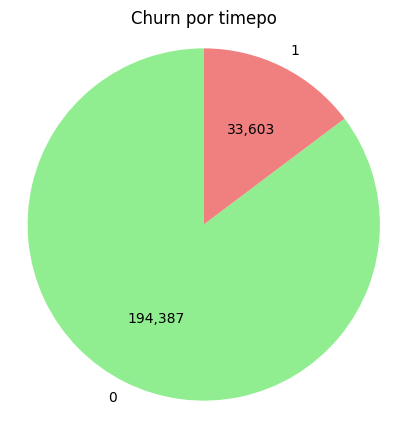

In [319]:
graficar_pie_serie_numerico(churn_por_account_tenure,'Churn por timepo',archivo='churn_timepo.png')

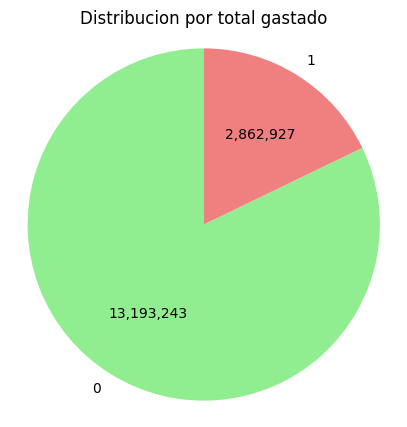

In [320]:
graficar_pie_serie_numerico(churn_por_account_chages_total,'Distribucion por total gastado',archivo='churn_cuentas_totales.png')

#📄Informe final

## Introducción

El objetivo de este análisis es entender el comportamiento de evasión (churn) de los clientes de TelecomX, identificando patrones y factores que influyen en la decisión de los clientes de abandonar la empresa. Esto permitirá tomar decisiones estratégicas para reducir la evasión y mejorar la fidelización.


## Limpieza y Tratamiento de Datos


Se realizaron los siguientes pasos:

- Importación de los datos desde un archivo JSON en GitHub.
- Expansión de columnas anidadas (por ejemplo, información del cliente, servicios de internet y teléfono, cuenta).
- Conversión de columnas numéricas a tipo `float64`.
- Identificación y manejo de valores faltantes o inconsistentes (NaN o strings vacíos).
- Normalización de nombres de columnas para facilitar su manipulación.
- Transformación de variables categóricas como `Yes/No` a valores numéricos (1/0).

In [322]:
datos_limpio.sample(5)

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,cuenta_diarias
7257,9975-SKRNR,0,Male,0,No,No,1,1,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,0,Mailed check,18.90,18.90,0.63
6016,8216-AZUUZ,0,Female,0,Yes,Yes,42,1,No,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,1,Electronic check,100.40,4303.65,3.35
4891,6689-VRRTK,0,Female,1,No,No,44,1,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,1,Credit card (automatic),109.80,4860.35,3.66
4014,5493-SDRDQ,1,Male,0,No,No,2,1,No,DSL,...,Yes,No,No,No,Month-to-month,1,Mailed check,55.10,113.35,1.84
5072,6924-TDGMT,0,Male,0,Yes,No,11,1,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,1,Mailed check,20.55,184.95,0.68


Se exploraron las siguientes dimensiones:

- Distribución de Churn
- Churn por género
- Churn por tipo de servicio
- Distribución del total de cargos mensuales y totales

## Conclusiones e Insights

- La mayoría de los clientes que permanecen generan la mayor parte de los ingresos.
- Existe una diferencia notable en la evasión según el género/servicio contratado.
- Los clientes con ciertos tipos de contrato o sin servicios adicionales tienen mayor probabilidad de churn.

## Recomendaciones

- Implementar campañas de retención para clientes en riesgo de churn.
- Revisar la estructura de contratos y servicios adicionales para incentivar la permanencia.
- Monitorear indicadores clave como el total de cargos y la duración de la relación con el cliente.